# AE588 Assignment 2

### 2.1


In [1]:
# import required modules

import numpy as np
import matplotlib.pyplot as plt

# define constants

ECC = 0.7  # e, eccentricity
MEAN_ANOM = np.pi/2.0  # M, mean_anomaly

# plotting fn for convergence


def plot_convergence(iters, values, diffs, title):
    error_const_list = []
    for value in values:
        error_const_list.append(abs(value-values[-1]))
    plt.plot(range(1, len(iters)+1), values, label="values")
    # plt.plot(range(1, len(iters)+1), [abs(diff)
    #          for diff in diffs], label="diffs")
    plt.plot(range(1, len(iters)+1), error_const_list, label="error sequence")
    plt.xlabel("Iterations")
    plt.legend(loc='best')
    plt.title(title)


# kepler's equation: E − e sin(E) = M;
def kepler_eq(eccentric_anomaly: float, eccentricity: float, mean_anomaly: float) -> float:
    return eccentric_anomaly - eccentricity*np.sin(eccentric_anomaly) - mean_anomaly

# kepler's equation in residual form: E − e sin(E) - M = 0


def kepler_eq_res(eccentric_anomaly: float, eccentricity: float, mean_anomaly: float) -> float:
    return eccentric_anomaly - eccentricity*np.sin(eccentric_anomaly) - mean_anomaly

#### 2.1.a) Implement Newton’s method


In [2]:
# newton stuff


# kepler's equation's residual differentiated wrt to E (eccentric anomaly):  1 - e cos(E)
def kepler_eq_res_de(eccentricity: float, eccentric_anomaly: float) -> float:
    return 1.0 - eccentricity*np.cos(eccentric_anomaly)

# newton's method


def newton_iter(func, func_diff, eccentric_anomaly: float, eccentricity: float, mean_anomaly: float, diff_stop: float, max_iters: int) -> (list[int], list[float], list[float]):
    iter_list = []
    value_list = []
    diff_list = []
    diff = 1
    iters = 0
    while (abs(diff) > diff_stop and iters < max_iters):
        iters += 1
        eccentric_anomaly_next = eccentric_anomaly - \
            func(eccentric_anomaly, eccentricity, mean_anomaly) / \
            func_diff(eccentricity, eccentric_anomaly)
        diff = eccentric_anomaly - eccentric_anomaly_next
        iter_list.append(iters)
        value_list.append(eccentric_anomaly)
        diff_list.append(diff)
        eccentric_anomaly = eccentric_anomaly_next
    return iter_list, value_list, diff_list

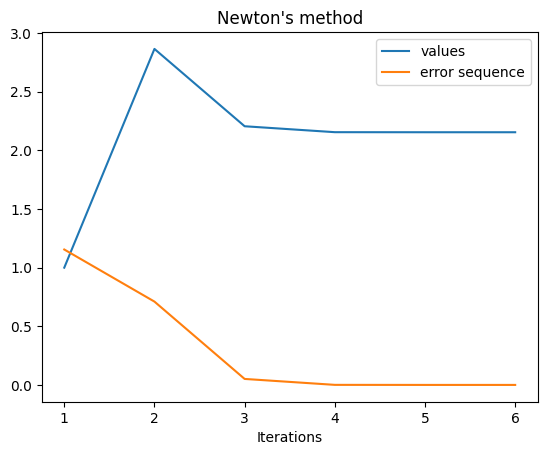

In [3]:
# do newton's method
NEWTON_DIFF = 0.000000001
NEWTON_MAX_ITERS = 100

eccentric_anomaly = 1  # initial guess
iters, values, diffs = newton_iter(kepler_eq_res, kepler_eq_res_de,
                                   eccentric_anomaly, ECC, MEAN_ANOM, NEWTON_DIFF, NEWTON_MAX_ITERS)


plot_convergence(iters, values, diffs, "Newton's method")

- Newton's method converges in 6 iterations
- the maximum precision here is limited by the precision of Pi as defined in np.pi


#### 2.1.b) Fixed point implementation


In [4]:
# fixed point function
def fixed_pt_fn(eccentric_anomaly: float, eccentricity: float, mean_anomaly: float) -> float:
    return mean_anomaly + eccentricity*np.sin(eccentric_anomaly)

# fixed point iteration


def fixed_pt_iter(func, eccentric_anomaly: float, eccentricity: float, mean_anomaly: float, diff_stop: float, max_iters: int) -> (list[int], list[float], list[float]):
    iter_list = []
    value_list = []
    diff_list = []
    diff = 1
    iters = 0
    while (abs(diff) > diff_stop and iters < max_iters):
        iters += 1
        eccentric_anomaly_next = func(
            eccentric_anomaly, eccentricity, mean_anomaly)
        diff = eccentric_anomaly - eccentric_anomaly_next
        iter_list.append(iters)
        value_list.append(eccentric_anomaly)
        diff_list.append(diff)
        eccentric_anomaly = eccentric_anomaly_next
    return iter_list, value_list, diff_list

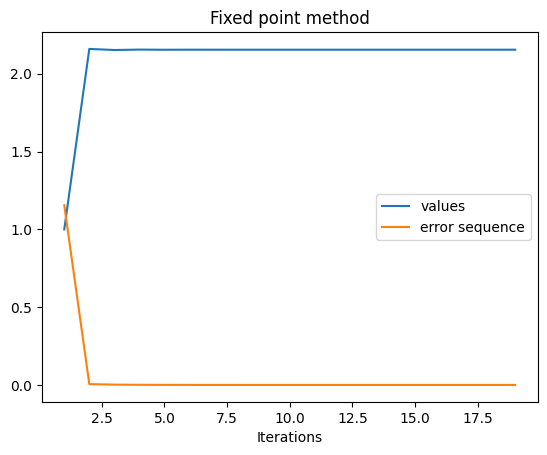

In [5]:
# do fixed point method

FIXED_DIFF = 0.000000001
FIXED_MAX_ITERS = 100

eccentric_anomaly = 1  # initial guess

iters, values, diffs = fixed_pt_iter(
    fixed_pt_fn, eccentric_anomaly, ECC, MEAN_ANOM, FIXED_DIFF, FIXED_MAX_ITERS)

plot_convergence(iters, values, diffs, "Fixed point method")

#### 2.1.c) Compare the number of iterations and rate of convergence.


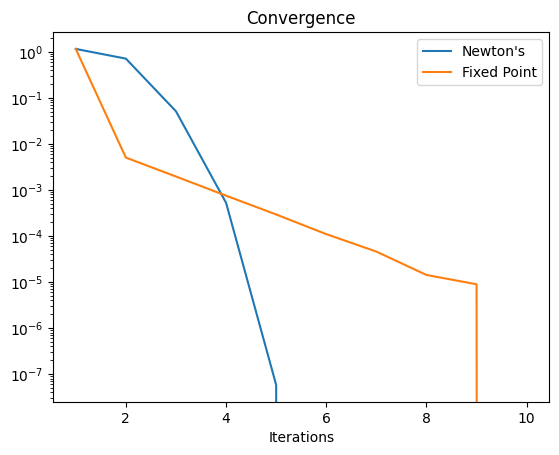

In [6]:
# comparing rate of convergence for same number of iterations
DIFF = 0.000000001
MAX_ITERS = 10

eccentric_anomaly = 1  # initial guess
iters_n, values_n, diffs_n = newton_iter(kepler_eq_res, kepler_eq_res_de,
                                         eccentric_anomaly, ECC, MEAN_ANOM, DIFF, MAX_ITERS)
eccentric_anomaly = 1  # initial guess
iters_f, values_f, diffs_f = fixed_pt_iter(
    fixed_pt_fn, eccentric_anomaly, ECC, MEAN_ANOM, DIFF, MAX_ITERS)

error_const_list_n = []
for value in values_n:
    error_const_list_n.append(abs(value-values_n[-1]))

error_const_list_f = []
for value in values_f:
    error_const_list_f.append(abs(value-values_f[-1]))

plt.plot(range(1, len(iters_n)+1), error_const_list_n, label="Newton's")
plt.plot(range(1, len(iters_f)+1), error_const_list_f, label="Fixed Point")
plt.yscale('log')
plt.xlabel("Iterations")
plt.legend(loc='best')
plt.title("Convergence")
plt.show()

- The fixed point method converges in 19 iterations compared to 5 iterations for Newton's for the same precision of 1e-9
- the rate of convergence is a lot higher for Newton's method
  - Newton: p ~= 2
  - Fixed point: p ~= 1, y ~= 0.1


#### 2.1.d) Evaluate the robustness of each method by trying different initial guesses for E


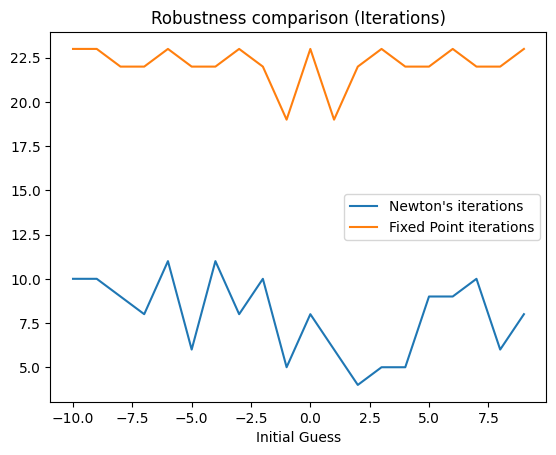

In [7]:
# robustness

ROB_RANGE = range(-10, 10, 1)
DIFF = 0.000000001
MAX_ITERS = 100

total_iters_n = []
total_vals_n = []
total_iters_f = []
total_vals_f = []
for guess in ROB_RANGE:
    iters_n, values_n, diffs_n = newton_iter(
        kepler_eq_res, kepler_eq_res_de, guess, ECC, MEAN_ANOM, DIFF, MAX_ITERS)
    total_iters_n.append(iters_n[-1])
    total_vals_n.append(values_n[-1])
    iters_f, values_f, diffs_f = fixed_pt_iter(
        fixed_pt_fn, guess, ECC, MEAN_ANOM, DIFF, MAX_ITERS)
    total_iters_f.append(iters_f[-1])
    total_vals_f.append(values_f[-1])

# comparing iterations needed for result
plt.plot(ROB_RANGE, total_iters_n, label="Newton's iterations")
plt.plot(ROB_RANGE, total_iters_f, label="Fixed Point iterations")
plt.xlabel("Initial Guess")
plt.legend(loc='best')
plt.title("Robustness comparison (Iterations)")
plt.show()

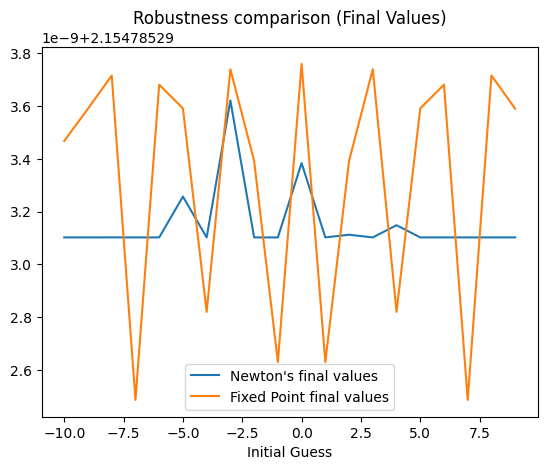

In [8]:
# comparing final values

plt.plot(ROB_RANGE, total_vals_n, label="Newton's final values")
plt.plot(ROB_RANGE, total_vals_f, label="Fixed Point final values")
# plt.yscale('log')
plt.xlabel("Initial Guess")
plt.legend(loc='best')
plt.title("Robustness comparison (Final Values)")
plt.show()
# print(total_vals_n, total_vals_f)

- both methods take a consistent amount of iterations to get to the final result within the same 1e-9 bounds
- Newton's method is more consistent compared to the fixed point method, but only by a small amount, in the order of 1e-9


#### 2.1.e) Plot E versus M in the interval [0, 2π] for e = [0, 0.1, 0.5, 0.9]. Optional: interpret your results physically.


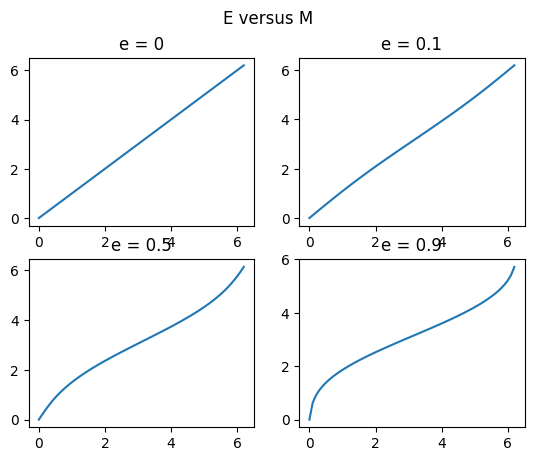

In [9]:
# generate data for the entire range

DIFF = 0.000000001
MAX_ITERS = 100

MEAN_ANOM_INTERVAL = np.arange(0, 2*np.pi, 0.1)
ECC_INTERVAL = [0, 0.1, 0.5, 0.9]

eccentric_anomaly = 1  # initial guess
eccentric_anomaly_list = []

# # plot the data
fig, axs = plt.subplots(ncols=int(len(ECC_INTERVAL)/2),
                        nrows=int(len(ECC_INTERVAL)/2))
fig.suptitle("E versus M")

it = 0
for ecc in ECC_INTERVAL:
    eccentric_anomaly_list = []
    for mean_anom in MEAN_ANOM_INTERVAL:
        iters, values, diffs = newton_iter(
            kepler_eq_res, kepler_eq_res_de, eccentric_anomaly, ecc, mean_anom, NEWTON_DIFF, NEWTON_MAX_ITERS)
        eccentric_anomaly_list.append(values[-1])
    axs[int(it/2)][int(it % 2)].set_title(f"e = {ecc}")
    axs[int(it/2)][int(it % 2)].plot(MEAN_ANOM_INTERVAL, eccentric_anomaly_list)
    it += 1

plt.show()

#### 2.1.f) Produce a plot showing the numerical noise by perturbing M in the neighborhood of M = π/2 with e = 0.7 using a solver convergence tolerance of |r| ≤ 0.01. Note: you might want to randomize the starting points for the solver.


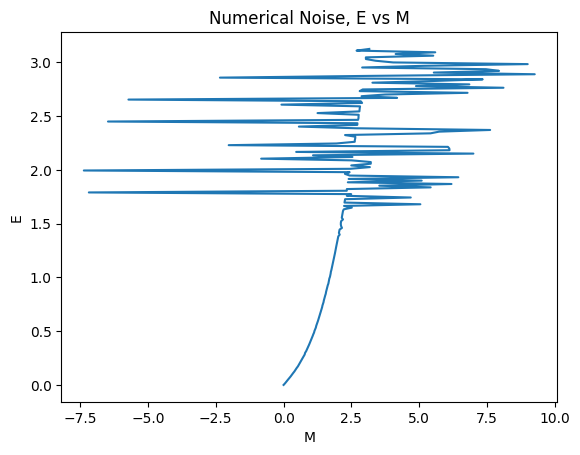

In [18]:

DIFF = 0.01
MAX_ITERS = 5
RAND_RANGE = np.pi/2
MEAN_ANOM_INTERVAL = np.arange(
    np.pi/2-RAND_RANGE, np.pi/2+RAND_RANGE, RAND_RANGE/100)

# eccentric_anomaly = 1  # initial guess
rng = np.random.default_rng()
sample_list = []
for mean_anom in MEAN_ANOM_INTERVAL:
    iters, values, diffs = newton_iter(
        kepler_eq_res, kepler_eq_res_de, rng.random(), ECC, mean_anom, DIFF, MAX_ITERS)
    sample_list.append(values[-1])
    # print(values)


plt.plot(sample_list, MEAN_ANOM_INTERVAL)
plt.xlabel("M")
plt.ylabel("E")
plt.title("Numerical Noise, E vs M")
plt.show()

# print(sample_list)
# print(sample_list, MEAN_ANOM_SAMPLE)